# Overview of PyLandStats

In [1]:
import pylandstats as pls

## Landscape analysis

We can load our landscape from a GeoTiff. We will use an extract of the Canton of Vaud (Switerland) derived from the [CORINE Land Cover dataset](https://land.copernicus.eu/pan-european/corine-land-cover) of the year 2000.

In [2]:
ls = pls.Landscape('../data/clc/vaud_g100_clc00_V18_5.tif')

For simplicity, it has been reclassified to show only *urban* (1) and *non-urban* (2) land cover classes

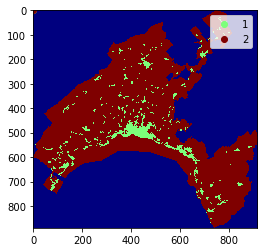

In [3]:
ls.plot_landscape(legend=True)

### Computing metrics

The metrics can be computed at the patch, class and landscape level

#### Patch-level metrics

The metrics can be computed at the patch level, that is, for each patch of the landscape:

In [4]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,130.991132,9200.509850,70.237654,2.009699,1.099107,3252.581096
1,1,23.998375,4800.002029,200.013624,2.449574,1.144638,282.833139
2,1,33.997698,4000.029040,117.655878,1.715056,1.084708,2830.098543
3,1,93.993637,8401.029149,89.378701,2.166323,1.112412,199.993230
4,1,401.972787,22800.707043,56.722017,2.843086,1.137425,199.993230


We can operate upon `patch_metrics_df` as with any other pandas DataFrame. In this case, there are 557 patches, of which 531 are *urban* and 26 *non-urban*, as noted respectively by the values of 1 and 2 within the `class_val` column:

In [5]:
patch_metrics_df['class_val'].value_counts()

1    531
2     26
Name: class_val, dtype: int64

We might also use methods from other libraries, such as matplotlib or numpy. For instance, in order to explore the size distribution of patches, we can also plot the distribution of the logarithm of `area` for *urban* and *non-urban* classes as follows:

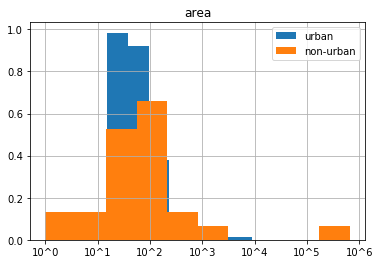

In [6]:
import matplotlib as mpl
import numpy as np

ax = patch_metrics_df[patch_metrics_df['class_val'] == 1].apply(np.log10).hist(
    column='area', label='urban', density=True)
ax = patch_metrics_df[patch_metrics_df['class_val'] == 2].apply(np.log10).hist(
    column='area', ax=ax, label='non-urban', density=True)

ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: '10^%d' % x))
ax[0].legend()

#### Class-level metrics

The metrics can also be computed at the class level, that is, aggregating over all patches of a land use/cover class

<a id='class-metrics-df'></a>

In [7]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,63527.699194,8.765912,531,0.073270,1.206603,3.844800e+06,5.305273,41.072713,119.637852,2423.290077,...,1.088307,0.217492,0.037986,3.483847,875.739134,584.499442,599.979691,6771.857983,806.184967,92.057661
2,661185.237955,91.234088,26,0.003588,90.727163,3.844800e+06,5.305273,14.744423,25430.201460,653861.442272,...,1.077818,0.234114,0.051352,4.748141,245.826406,200.135431,211.796230,247.205228,75.622392,30.762518


#### Landscape-level metrics

Finally, the metrics can also be computed at the landscape level, that is, aggregating over all patches of the landscape

In [8]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
0,724712.937149,557,0.076858,90.727163,0.0,0.0,14.952919,1301.100426,596756.946333,42.997089,...,0.038758,3.555948,846.335668,233.828443,565.666278,6771.857983,798.448593,94.341834,70.792237,0.297088


### Choosing your metrics

You can see all the implemented metrics through the following constants defined at the `Landscape` class:

<a id='available-metrics'></a>

In [9]:
pls.Landscape.PATCH_METRICS, pls.Landscape.CLASS_METRICS, pls.Landscape.LANDSCAPE_METRICS

(['area',
  'perimeter',
  'perimeter_area_ratio',
  'shape_index',
  'fractal_dimension',
  'euclidean_nearest_neighbor'],
 ['total_area',
  'proportion_of_landscape',
  'number_of_patches',
  'patch_density',
  'largest_patch_index',
  'total_edge',
  'edge_density',
  'landscape_shape_index',
  'area_mn',
  'area_am',
  'area_md',
  'area_ra',
  'area_sd',
  'area_cv',
  'perimeter_area_ratio_mn',
  'perimeter_area_ratio_am',
  'perimeter_area_ratio_md',
  'perimeter_area_ratio_ra',
  'perimeter_area_ratio_sd',
  'perimeter_area_ratio_cv',
  'shape_index_mn',
  'shape_index_am',
  'shape_index_md',
  'shape_index_ra',
  'shape_index_sd',
  'shape_index_cv',
  'fractal_dimension_mn',
  'fractal_dimension_am',
  'fractal_dimension_md',
  'fractal_dimension_ra',
  'fractal_dimension_sd',
  'fractal_dimension_cv',
  'euclidean_nearest_neighbor_mn',
  'euclidean_nearest_neighbor_am',
  'euclidean_nearest_neighbor_md',
  'euclidean_nearest_neighbor_ra',
  'euclidean_nearest_neighbor_sd',


The names above appear in snake-case since they correspond to the methods that compute them, implemented within the `Landscape` class. If you are only interested in a subset of the metrics above, you can specify it in each respective method, that is, `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df`. For instance:

<a id='subset-class-metrics-df'></a>

In [10]:
subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=['proportion_of_landscape', 'edge_density'])
subset_class_metrics_df

,proportion_of_landscape,edge_density
class_val,,
1,8.765912,5.305273
2,91.234088,5.305273


#### Documentation about the metrics

Each method is documented to provide a description of its arguments as well as information concerning its respective metric, e.g.:

In [11]:
help(pls.Landscape.edge_density)

Help on function edge_density in module pylandstats.landscape:

edge_density(self, class_val=None, count_boundary=False, hectares=True)
    Measure of edge length per area unit, which facilitates comparison
    among landscapes of different sizes (of a particular class if provided,
    otherwise for the whole landscape)
    
    Parameters
    ----------
    class_val : int, optional
        If provided, the metric will be computed at the level of the
        corresponding class, otherwise it will be computed at the
        landscape level
    count_boundary : bool, default False
        Whether the boundary of the landscape should be considered
    hectares : bool, default True
        Whether the landscape area should be converted to hectares (tends
        to yield more legible values for the metric)
    
    Returns
    -------
    ed : float
        ed >= 0, without limit ; ed equals 0 when the entire landscape and
        its border consist of the corresponding patch class.
     

#### Custom metric arguments

The default arguments correspond to how the metrics are defined within FRAGSTATS. Nevertheless, some metrics allow some variations in their definition. For instance, the `edge_density` above allows us to choose whether we consider the landscape boundary to be an edge (by default, as in FRAGSTATS, we do not, since we only consider edges between land use/cover classes), or whether we want the area to be converted to hectares (by default, as in FRAGSTATS, we do).

In [12]:
print("Edge density (without boundary, meters of edge per hectare):\n{}\n".format(
    ls.edge_density()))
print("Edge density (with boundary, meters of edge per hectare):\n{}\n".format(
    ls.edge_density(count_boundary=True)))
print("Edge density (with boundary, meters of edge per square meter):\n{}".format(
    ls.edge_density(count_boundary=True, hectares=False)))

Edge density (without boundary, meters of edge per hectare):
0.0

Edge density (with boundary, meters of edge per hectare):
7.0259162808516

Edge density (with boundary, meters of edge per square meter):
0.0007025916280851601


For more details, see the documentation for each metric's method.

If we want to obtain a patch, class or landscape-level DataFrame with some customized metrics, instead of manually calling each metric's method with its respective parameters, we can use the `metrics_kws` argument of the `Landscape.compute_patch_metrics_df`, `Landscape.compute_patch_metrics_df` and/or `Landscape.compute_class_metrics_df` to set the keyword arguments to be passed to the some metric methods. For instance, if we wanted `proportion_of_landscape` as a fraction instead of a percentage and `edge_density` to include the boundary, we can do it as follows:

In [13]:
custom_class_metrics_df = ls.compute_class_metrics_df(
    metrics_kws={
        'proportion_of_landscape': {'percent': False},
        'edge_density': {'count_boundary': True}
    })
custom_class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,63527.699194,0.087659,531,0.073270,1.206603,3.844800e+06,5.713851,41.072713,119.637852,2423.290077,...,1.088307,0.217492,0.037986,3.483847,875.739134,584.499442,599.979691,6771.857983,806.184967,92.057661
2,661185.237955,0.912341,26,0.003588,90.727163,3.844800e+06,6.617338,14.744423,25430.201460,653861.442272,...,1.077818,0.234114,0.051352,4.748141,245.826406,200.135431,211.796230,247.205228,75.622392,30.762518


Note that the values for `proportion_of_landscape` and `edge_density` are different now than when we computed them with the default arguments for their respective methods (in the [class_metrics_df](#class-metrics-df) and [subset_class_metrics_df](#subset-class-metrics-df) above).

Note also that the `custom_class_metrics_df` does not only feature `proportion_of_landscape` and `edge_density` but features all the available metrics instead. This is because the `metrics_kws` argument does not imply that only the the metrics defined on it will be computed, only that the metrics defined on it will be computed with the specified arguments.

We might choose to only compute a reduced set of metrics, some of which with non-default arguments, by setting both the `metrics` and `metric_kws` arguments:

In [14]:
custom_subset_class_metrics_df = ls.compute_class_metrics_df(
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'],
    metrics_kws={
        'proportion_of_landscape': {'percent': False}, 
        'edge_density': {'count_boundary': True}
    })
custom_subset_class_metrics_df

,proportion_of_landscape,edge_density,fractal_dimension_am
class_val,,,
1,0.087659,5.713851,1.143977
2,0.912341,6.617338,1.233533


The same could be done for the `Landscape.compute_patch_metrics_df` or `Landscape.compute_landscape_metrics_df` methods. Check the documentation of each metric's method for more details on how they might be customized through their arguments.

## Spatio-temporal analysis

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To this end, we can use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In this case, we will use the three extracts of the Canton of Vaud from the [CORINE Land Cover datasets](https://land.copernicus.eu/pan-european/corine-land-cover) for the years 2000, 2006 and 2012.

In [15]:
input_fnames = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_fnames, dates=[2000, 2006, 2012])

### Spatio-temporal DataFrames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which are available as [properties](https://docs.python.org/3/howto/descriptor.html#properties) of our `SpatioTemporalAnalysis` instance. For instance, a DataFrame of the class-level metrics can be obtained as follows:

In [16]:
sta.class_metrics_df

metric          total_area proportion_of_landscape number_of_patches  \
class_val dates                                                        
1         2000     63527.7                 8.76591               531   
          2006     65404.6                 9.03162               529   
          2012     65745.5                 9.07942               529   
2         2000      661185                 91.2341                26   
          2006      658768                 90.9684                32   
          2012      658370                 90.9206                33   

metric          patch_density largest_patch_index  total_edge edge_density  \
class_val dates                                                              
1         2000      0.0732704              1.2066  3.8448e+06      5.30527   
          2006      0.0730488             1.30153  3.8611e+06      5.33173   
          2012      0.0730546             1.30385  3.8737e+06      5.34955   
2         2000     0.00358763             90.7272  3.8448e+06      5.30527   
          2006     0.00441883             90.5291  3.8611e+06      5.33173   
          2012     0.00455728             90.4761  3.8737e+06      5.34955   

metric          landscape_shape_index  area_mn  area_am  ...  \
class_val dates                                          ...   
1         2000                41.0727  119.638  2423.29  ...   
          2006                40.7919  123.638  2486.79  ...   
          2012                40.8029  124.283  2482.29  ...   
2         2000                14.7444  25430.2   653861  ...   
          2006                14.8922  20586.5   652424  ...   
          2012                 14.946  19950.6   651951  ...   

metric          fractal_dimension_md fractal_dimension_ra  \
class_val dates                                             
1         2000               1.08831             0.217492   
          2006               1.08955             0.216726   
          2012               1.08989             0.216925   
2         2000               1.07782             0.234114   
          2006               1.07411             0.235312   
          2012               1.07109             0.235582   

metric          fractal_dimension_sd fractal_dimension_cv  \
class_val dates                                             
1         2000             0.0379863              3.48385   
          2006             0.0373499              3.42193   
          2012             0.0373281              3.42032   
2         2000             0.0513524              4.74814   
          2006             0.0470818              4.37251   
          2012             0.0460633              4.27763   

metric          euclidean_nearest_neighbor_mn euclidean_nearest_neighbor_am  \
class_val dates                                                               
1         2000                        875.739                       584.499   
          2006                        883.012                       591.363   
          2012                         883.75                       591.276   
2         2000                        245.826                       200.135   
          2006                        297.874                       200.441   
          2012                        297.938                       200.443   

metric          euclidean_nearest_neighbor_md euclidean_nearest_neighbor_ra  \
class_val dates                                                               
1         2000                         599.98                       6771.86   
          2006                        632.434                       6771.86   
          2012                        640.291                       6771.86   
2         2000                        211.796                       247.205   
          2006                        211.796                       699.976   
          2012                        223.599                       699.976   

metric          euclidean_nearest_neighbo

Again, we can use the operations of any pandas DataFrame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 2000

In [17]:
sta.class_metrics_df.loc[(1, 2000)]

metric
total_area                          63527.7
proportion_of_landscape             8.76591
number_of_patches                       531
patch_density                     0.0732704
largest_patch_index                  1.2066
total_edge                       3.8448e+06
edge_density                        5.30527
landscape_shape_index               41.0727
area_mn                             119.638
area_am                             2423.29
area_md                             42.9971
area_ra                             8743.41
area_sd                              524.98
area_cv                             438.808
perimeter_area_ratio_mn             111.829
perimeter_area_ratio_am             65.1826
perimeter_area_ratio_md             107.144
perimeter_area_ratio_ra             377.774
perimeter_area_ratio_sd             49.4216
perimeter_area_ratio_cv             44.1938
shape_index_mn                      1.91698
shape_index_am                      3.69741
shape_index_md           

Similarly, the DataFrame of landscape metrics can be obtained as follows:

In [18]:
sta.landscape_metrics_df

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,724713,557,0.076858,90.7272,0,0,14.9529,1301.1,596757,42.9971,...,0.0387578,3.55595,846.336,233.828,565.666,6771.86,798.449,94.3418,70.7922,0.297088
2006,724173,561,0.0774677,90.5291,0,0,15.1198,1290.86,593724,43.997,...,0.0381253,3.49566,849.636,235.747,599.98,6771.86,777.439,91.5026,70.289,0.303269
2012,724116,562,0.0776119,90.4761,0,0,15.1656,1288.46,592983,43.997,...,0.0380502,3.48921,849.352,235.929,599.98,6771.86,771.401,90.8223,70.184,0.304372


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics only with the `metrics` argument, however, for `SpatioTemporalAnalysis` instances, we must pass it to the initialization method as in:

In [19]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, 
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'], 
    dates=[2000, 2006, 2012])
sta.class_metrics_df

metric          edge_density fractal_dimension_am proportion_of_landscape
class_val dates                                                          
1         2000       5.30527              1.14398                 8.76591
          2006       5.33173              1.13987                 9.03162
          2012       5.34955              1.13989                 9.07942
2         2000       5.30527              1.23353                 91.2341
          2006       5.33173              1.23471                 90.9684
          2012       5.34955              1.23497                 90.9206

Similarly, we can choose to compute them only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [20]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012])
sta.class_metrics_df

metric          edge_density fractal_dimension_am landscape_shape_index  \
class_val dates                                                           
1         2000       5.30527              1.14398               41.0727   
          2006       5.33173              1.13987               40.7919   
          2012       5.34955              1.13989               40.8029   

metric          proportion_of_landscape  
class_val dates                          
1         2000                  8.76591  
          2006                  9.03162  
          2012                  9.07942

Finally, we can also customize how some metrics are computed through the `metrics_kws` argument. Again, for `SpatioTemporalAnalysis`, we must pass it to the initialization method.

In [21]:
sta = pls.SpatioTemporalAnalysis(
    input_fnames, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012], 
    metrics_kws={
        'proportion_of_landscape': {'percent': False},
        'edge_density': {'count_boundary': True}
    })
sta.class_metrics_df

metric          edge_density fractal_dimension_am landscape_shape_index  \
class_val dates                                                           
1         2000       5.71385              1.14398               41.0727   
          2006        5.7623              1.13987               40.7919   
          2012       5.77932              1.13989               40.8029   

metric          proportion_of_landscape  
class_val dates                          
1         2000                0.0876591  
          2006                0.0903162  
          2012                0.0907942

The fact that all the above arguments are passed to `SpatioTemporalAnalysis` initialization method means that once we have chosen a subset of metrics, classes or customized some metrics, we will not be able to modify such choices without having to re-initialize a `SpatioTemporalAnalysis` instance. Therefore, if you do not know which metrics or classes you will need, just compute them all and filter the DataFrames later if needed.

### Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics.

#### Plotting a single metric

We can plot the `proportion_of_landscape` occupied by the *urban* class (`class_val` of 1) as in:

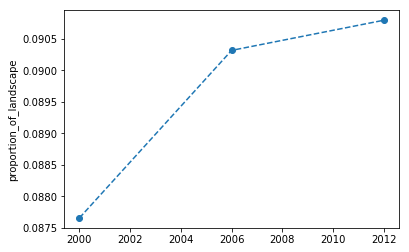

In [22]:
sta.plot_metric('proportion_of_landscape', class_val=1)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details, or [see above](available-metrics) the metrics that can be at each level.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

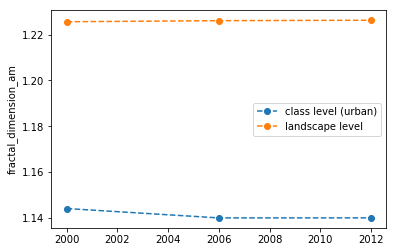

In [23]:
ax = sta.plot_metric('fractal_dimension_am', class_val=1, 
                     plot_kws={'label': 'class level (urban)'})
sta.plot_metric('fractal_dimension_am', ax=ax, plot_kws={'label': 'landscape level'})
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  `SpatioTemporalAnalysis.plot_metric` for more details.

#### Plotting multiple metrics

We can plot multiple metrics in a matplotlib axis grid through the `plot_metrics` method. For instance, we can plot all the metrics at the *urban* class level (`class_val` of 1) as in:

Text(0.5, 0.98, 'Class-level metrics (urban)')

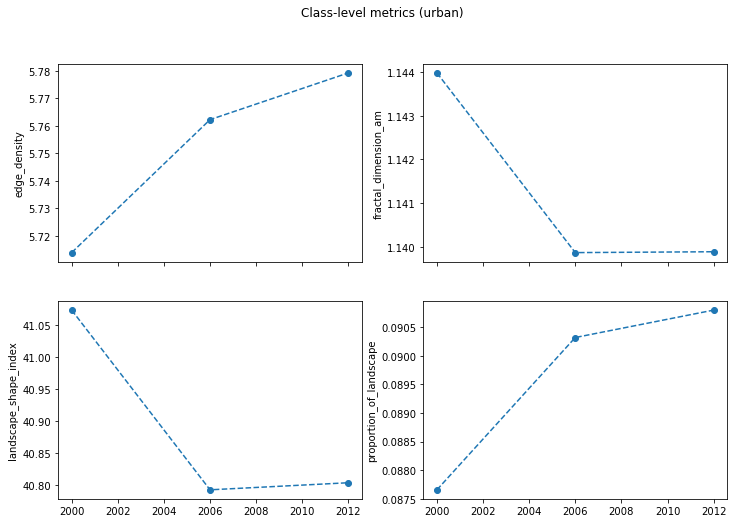

In [24]:
fig, axes = sta.plot_metrics(class_val=1, num_cols=2)
fig.suptitle('Class-level metrics (urban)')

We might also choose to plot only a subset of metrics by setting the `metrics` argument as in:

Text(0.5, 0.98, 'Class-level metrics (urban)')

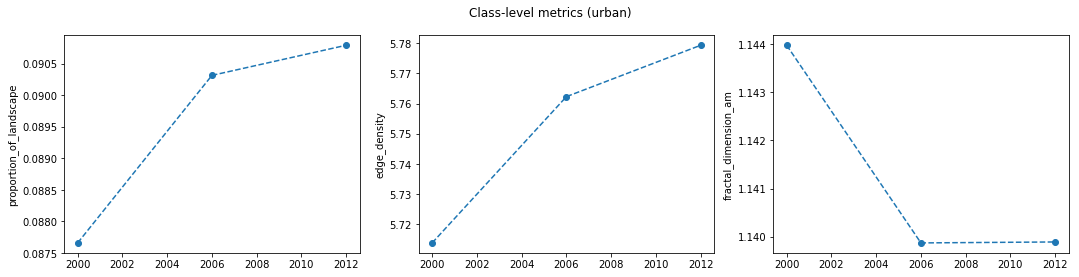

In [25]:
fig, axes = sta.plot_metrics(
    class_val=1,
    metrics=['proportion_of_landscape', 'edge_density', 'fractal_dimension_am'],
    num_cols=3)
fig.suptitle('Class-level metrics (urban)')

In order to compute the metrics at the landscape level, we can still use `plot_metrics` but without setting the `class_val` argument:

Text(0.5, 0.98, 'Landscape-level metrics')

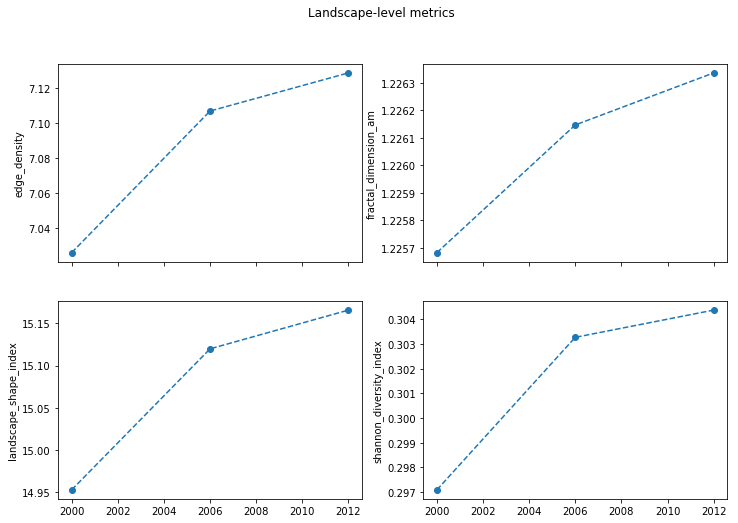

In [26]:
fig, axes = sta.plot_metrics(num_cols=2)
fig.suptitle('Landscape-level metrics')

See the documentation of `SpatioTemporalAnalysis.plot_metrics` for more details.